In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
# import some data to play with
cdata = pd.read_csv('Company_Data.csv',index_col=0)
cdata

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
Sales,,,,,,,,,,
9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
11.22,111,48,16,260,83,Good,65,10,Yes,Yes
10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...
12.57,138,108,17,203,128,Good,33,14,Yes,Yes
6.14,139,23,3,37,120,Medium,55,11,No,Yes
7.41,162,26,12,368,159,Medium,40,18,Yes,Yes


In [3]:
cdata.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 400 entries, 9.5 to 9.71
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CompPrice    400 non-null    int64 
 1   Income       400 non-null    int64 
 2   Advertising  400 non-null    int64 
 3   Population   400 non-null    int64 
 4   Price        400 non-null    int64 
 5   ShelveLoc    400 non-null    object
 6   Age          400 non-null    int64 
 7   Education    400 non-null    int64 
 8   Urban        400 non-null    object
 9   US           400 non-null    object
dtypes: int64(7), object(3)
memory usage: 34.4+ KB


In [5]:
#Creating dummy vairables dropping first dummy variable
#Convert categorical variable into dummy/indicator variables.
df=pd.get_dummies(cdata,columns=['Urban','US'], drop_first=True)
df

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
Sales,,,,,,,,,,
9.50,138,73,11,276,120,Bad,42,17,1,1
11.22,111,48,16,260,83,Good,65,10,1,1
10.06,113,35,10,269,80,Medium,59,12,1,1
7.40,117,100,4,466,97,Medium,55,14,1,1
4.15,141,64,3,340,128,Bad,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
12.57,138,108,17,203,128,Good,33,14,1,1
6.14,139,23,3,37,120,Medium,55,11,0,1
7.41,162,26,12,368,159,Medium,40,18,1,1


In [6]:
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

In [7]:
df['ShelveLoc']=df['ShelveLoc'].map({'Good':1,'Medium':2,'Bad':3})
df

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
Sales,,,,,,,,,,
9.50,138,73,11,276,120,3,42,17,1,1
11.22,111,48,16,260,83,1,65,10,1,1
10.06,113,35,10,269,80,2,59,12,1,1
7.40,117,100,4,466,97,2,55,14,1,1
4.15,141,64,3,340,128,3,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
12.57,138,108,17,203,128,1,33,14,1,1
6.14,139,23,3,37,120,2,55,11,0,1
7.41,162,26,12,368,159,2,40,18,1,1


In [8]:
x=df.iloc[:,0:6]
y=df['ShelveLoc']
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc
Sales,,,,,,
9.50,138,73,11,276,120,3
11.22,111,48,16,260,83,1
10.06,113,35,10,269,80,2
7.40,117,100,4,466,97,2
4.15,141,64,3,340,128,3
...,...,...,...,...,...,...
12.57,138,108,17,203,128,1
6.14,139,23,3,37,120,2
7.41,162,26,12,368,159,2


In [9]:
y

Sales
9.50     3
11.22    1
10.06    2
7.40     2
4.15     3
        ..
12.57    1
6.14     2
7.41     2
5.94     3
9.71     1
Name: ShelveLoc, Length: 400, dtype: int64

In [10]:
df['ShelveLoc'].unique()

array([3, 1, 2])

In [11]:
df.ShelveLoc.value_counts()

2    219
3     96
1     85
Name: ShelveLoc, dtype: int64

In [12]:
colnames = list(df.columns)
colnames

['CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban_Yes',
 'US_Yes']

In [13]:
# Descriptive statistics for each column
df.describe()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,124.975000,68.657500,6.635000,264.840000,115.795000,2.027500,53.322500,13.900000,0.705000,0.645000
std,15.334512,27.986037,6.650364,147.376436,23.676664,0.672961,16.200297,2.620528,0.456614,0.479113
min,77.000000,21.000000,0.000000,10.000000,24.000000,1.000000,25.000000,10.000000,0.000000,0.000000
25%,115.000000,42.750000,0.000000,139.000000,100.000000,2.000000,39.750000,12.000000,0.000000,0.000000
50%,125.000000,69.000000,5.000000,272.000000,117.000000,2.000000,54.500000,14.000000,1.000000,1.000000
75%,135.000000,91.000000,12.000000,398.500000,131.000000,2.000000,66.000000,16.000000,1.000000,1.000000
max,175.000000,120.000000,29.000000,509.000000,191.000000,3.000000,80.000000,18.000000,1.000000,1.000000


In [14]:
df.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
Sales,,,,,,,,,,
9.50,138,73,11,276,120,3,42,17,1,1
11.22,111,48,16,260,83,1,65,10,1,1
10.06,113,35,10,269,80,2,59,12,1,1
7.40,117,100,4,466,97,2,55,14,1,1
4.15,141,64,3,340,128,3,38,13,1,0


In [16]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

In [17]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

# Building Decision Tree Classifier using Entropy Criteria

In [18]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

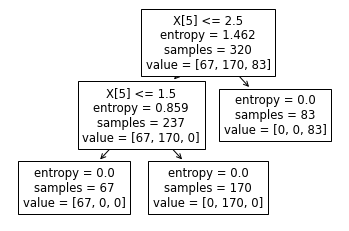

In [19]:
#PLot the decision tree
tree.plot_tree(model);

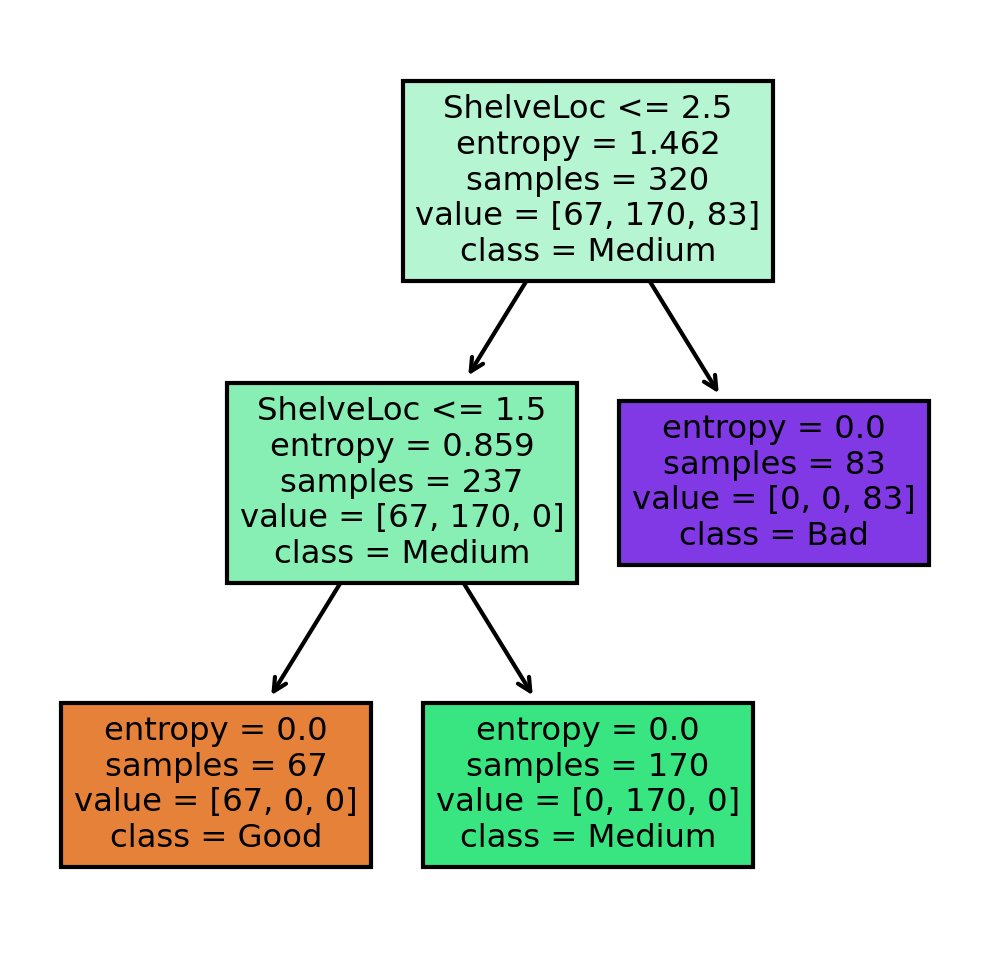

In [20]:
fn=['CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban_Yes',
 'US_Yes']
cn=['Good','Medium','Bad']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [23]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

2    49
1    18
3    13
dtype: int64

In [24]:
preds

array([1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 3, 1, 3, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 1, 3, 1, 1, 1, 1, 1, 2, 1, 2, 1, 3, 2, 2, 2, 3, 2, 2,
       2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 3, 1, 2, 2, 3, 3, 2, 2, 2, 2, 3, 1,
       1, 2, 3, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3])

In [25]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,1,2,3
ShelveLoc,,,
1,18,0,0
2,0,49,0
3,0,0,13


In [26]:
# Accuracy 
np.mean(preds==y_test)

1.0

# from sklearn.metrics import classification_report




In [27]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        49
           3       1.00      1.00      1.00        13

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



In [28]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [29]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [30]:
#Prediction and computing the accuracy
pred=model_gini.predict(x_test)
np.mean(preds==y_test)

1.0

In [31]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        49
           3       1.00      1.00      1.00        13

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



In [32]:
# Decision Tree Regress
from sklearn.tree import DecisionTreeRegressor

In [33]:
array = cdata.values
X = array[:,0:3]
y = array[:,3]
X

array([[138, 73, 11],
       [111, 48, 16],
       [113, 35, 10],
       ...,
       [162, 26, 12],
       [100, 79, 7],
       [134, 37, 0]], dtype=object)

In [34]:
y

array([276, 260, 269, 466, 340, 501, 45, 425, 108, 131, 150, 503, 393, 29,
       148, 400, 284, 251, 408, 58, 367, 239, 497, 292, 294, 176, 496, 19,
       359, 226, 447, 241, 236, 317, 406, 29, 270, 412, 454, 144, 18, 403,
       25, 16, 325, 168, 16, 173, 349, 51, 341, 150, 112, 39, 25, 60, 54,
       22, 188, 148, 469, 358, 146, 170, 184, 197, 508, 152, 366, 339,
       237, 148, 432, 54, 125, 480, 346, 44, 139, 286, 353, 237, 325, 468,
       52, 304, 432, 272, 144, 493, 491, 267, 97, 67, 134, 237, 407, 287,
       382, 220, 94, 89, 57, 334, 472, 398, 217, 104, 488, 217, 125, 272,
       298, 335, 17, 95, 202, 507, 243, 137, 249, 380, 45, 125, 181, 181,
       60, 192, 350, 279, 497, 208, 232, 265, 327, 384, 10, 436, 371, 310,
       277, 331, 300, 36, 264, 27, 412, 402, 384, 140, 176, 407, 341, 488,
       289, 59, 220, 249, 189, 372, 486, 81, 424, 40, 58, 100, 151, 216,
       425, 492, 356, 416, 123, 207, 358, 38, 480, 148, 89, 70, 434, 79,
       230, 426, 35, 449, 93, 142, 42

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [36]:
modelf = DecisionTreeRegressor()
modelf.fit(X_train, y_train)

DecisionTreeRegressor()

In [37]:
#Find the accuracy
modelf.score(X_test,y_test)

-0.9362852728494193

Feature: 0, Score: 0.36879
Feature: 1, Score: 0.30535
Feature: 2, Score: 0.32586


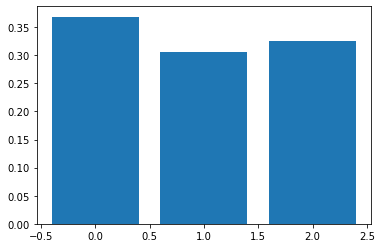

In [38]:
# get importance
importance = modelf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()